# Data Exploration

In [3]:
# import polars as pl
import pandas as pd
import ray
import modin.pandas as md
from pandarallel import pandarallel
import time
import json
import gzip
import jsonpickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# from thefuzz import fuzz
# from thefuzz import process
from rapidfuzz import fuzz, process, utils, string_metric

# from pycaret.classification import *

# from sklearn import metrics
# from sklearn.ensemble import ExtraTreesClassifier

In [375]:
ray.shutdown()

In [376]:
ray.init()

2022-09-07 07:49:31,101	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265


RayContext(dashboard_url='127.0.0.1:8265', python_version='3.9.12', ray_version='1.12.0', ray_commit='f18fc31c7562990955556899090f8e8656b48d2d', address_info={'node_ip_address': '127.0.0.1', 'raylet_ip_address': '127.0.0.1', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-09-07_07-49-28_098649_49088/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-09-07_07-49-28_098649_49088/sockets/raylet', 'webui_url': '127.0.0.1:8265', 'session_dir': '/tmp/ray/session_2022-09-07_07-49-28_098649_49088', 'metrics_export_port': 65056, 'gcs_address': '127.0.0.1:64182', 'address': '127.0.0.1:64182', 'node_id': '8bb8a461935b0c06f93cb3b13d103f6cea8eb261fd7d510678262c48'})

In [4]:
%%time
# data = pl.read_parquet("../data/interim/tranco_16_05_22_10k_run_06/part_0.parquet.gzip")
# data2 = pd.read_parquet("../data/interim/tranco_16_05_22_10k_run_06/part_0.parquet.gzip")
# data2 = md.read_parquet("../data/interim/tranco_16_05_22_10k_run_06/part_0.parquet.gzip")

data = pd.read_parquet("../data/interim/part_0_dtypes.parquet.gzip")

CPU times: user 5.04 s, sys: 1.31 s, total: 6.35 s
Wall time: 6.42 s


In [5]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [55]:
%%time
data

CPU times: user 4 µs, sys: 7 µs, total: 11 µs
Wall time: 22.9 µs


,hostname,pathname,filetype,filename,protocol,query,content-type,vary,cache-control,pragma,...,x-hello-human,x-libsyn-host,x-client-geo-latlong,x-client-geo-country,x-client-geo-city,x-client-geo-region,x-client-geo-metrocode,x-client-geo-zip,mid,tracker
0,csp.withgoogle.com,/csp/uxe-owners-acl/marketing_platform,/csp/uxe-owners-acl/marketing_platform,marketing_platform,https:,[],text/html; charset=utf-8,"sec-fetch-dest, sec-fetch-mode, sec-fetch-site","no-cache, no-store, max-age=0, must-revalidate",no-cache,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
1,ei.phncdn.com,/www-static/js/lib/networkbar-5.0.0.js,js,networkbar-5.0.0.js,https:,"[[cache, 2022051705]]",application/javascript,accept-encoding,max-age=10368000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
2,ei.phncdn.com,/www-static/images/pornhub_logo_straight.svg,svg,pornhub_logo_straight.svg,https:,"[[cache, 2022051705]]",image/svg+xml,accept-encoding,max-age=10368000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
3,ei.phncdn.com,/videos/202201/09/401031701/original/(m=eafTGg...,jpg,(m=eafTGgaaaa)(mh=wv_2B3Uo7aDPa66D)9.jpg,https:,[],image/jpeg,NaN,max-age=9945154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
4,di.phncdn.com,/videos/202203/14/404605051/original/(m=q3WX_I...,jpg,(m=q3WX_IXbeafTGgaaaa)(mh=yFGzYLUJ7NCGW6_e)0.jpg,https:,[],image/jpeg,NaN,max-age=10466555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167553,cdnjs.cloudflare.com,/ajax/libs/angular-ui-router/0.2.10/angular-ui...,js,angular-ui-router.min.js,https:,"[[v, 14.158.0]]",application/javascript; charset=utf-8,accept-encoding,"public, max-age=30672000",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
167554,www.browsealoud.com,/modules/3.6.1/136.fc673e37f3d700e1ec0d.js,js,136.fc673e37f3d700e1ec0d.js,https:,[],application/javascript,"origin,access-control-request-headers,access-c...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0
167555,www.googletagmanager.com,/gtag/js,/gtag/js,js,https:,"[[id, AW-627293384]]",application/javascript; charset=utf-8,accept-encoding,"private, max-age=900",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,1
167556,buy.tinypass.com,/ng/common/i18n/platform-translation-map_en_US.js,js,platform-translation-map_en_US.js,https:,"[[version, 14.158.0]]",application/javascript;charset=utf-8,accept-encoding,"public, max-age=86400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,0


In [35]:
data.info(memory_usage="deep")

# 14GB -> 763MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167558 entries, 0 to 167557
Columns: 3921 entries, easylist to mid
dtypes: Int64(602), bool(2), category(3316), object(1)
memory usage: 1.5 GB


In [ ]:
# pycaret test
# takes too much time
# example = setup(data2, target="easyprivacy", fold_shuffle=True, session_id=123)

In [372]:
@ray.remote
def check_col_with_category_dtype(col_name, old_memory):
    index = data.columns.get_loc(col_name)
    if col_name in ["query"]:
        return
    print(index, col_name)
    new_memory = data[col_name].astype("category").memory_usage(deep=True)
    if new_memory < old_memory[index + 1]:
        # data2[col_name] = data2[col_name].astype("category")
        return col_name

In [ ]:
current_memory = data.memory_usage(deep=True)

In [ ]:
%%time
category_list = ray.get(
    [check_col_with_category_dtype.remote(column, current_memory) for column in data]
)

In [ ]:
%%time
category_list = data.parallel_apply(
    lambda x: check_col_with_category_dtype(x.name, current_memory), axis=0
)

In [ ]:
category_list_final = [i for i in category_list if i is not None]
category_list_final

In [ ]:
dict_categories = {i: "category" for i in category_list_final}
dict_categories

In [ ]:
with open("dict_categories.json", "w") as f:
    json.dump(dict_categories, f)

In [56]:
with open("dict_categories2.json", 'r') as categories:
    dict_categories = json.loads(categories.read())

In [ ]:
# if "hostnaadawdme" not in dict_categories:
#     print("yes")

In [ ]:
%%time
data = data.astype(dict_categories)

In [60]:
data.dtypes

hostname                  category
pathname                  category
filetype                  category
filename                  category
protocol                  category
                            ...   
x-client-geo-region       category
x-client-geo-metrocode    category
x-client-geo-zip             Int64
mid                          Int64
tracker                      int32
Length: 3920, dtype: object

## Final approach:
#### 1. current_memory = data2.memory_usage(deep=True)
#### -- moding df --
#### 2. category_list = ray.get([test2.remote(column, current_memory) for column in data2])
#### 3. category_list_final = [i for i in category_list if i is not None]
#### 4. dict_categories = {i : 'category' for i in category_list_final}
#### 5. with open("dict_categories.json", "w") as f:
####      json.dump(dict_categories, f)
#### -- pandas df --
#### 6. data2 = data2.astype(dict_categories)

### Compress JSON Files

In [33]:
with open("../data/raw/tranco_16_05_22_10k_run_06/http/http.4.json", 'r') as raw_data:
    raw_data_test = json.loads(raw_data.read())

In [34]:
with gzip.open("../data/raw/tranco_16_05_22_10k_run_06/http/http.4.json.gzip", 'wt') as zipfile:
    json.dump(raw_data_test, zipfile)

### Exploration with New Datatypes

In [116]:
(data.isna().sum() / len(data)) >= 0.95

hostname                  False
pathname                  False
filetype                  False
filename                  False
protocol                  False
                          ...  
x-client-geo-region        True
x-client-geo-metrocode     True
x-client-geo-zip           True
mid                        True
tracker                   False
Length: 3920, dtype: bool

In [37]:
data.select_dtypes(include=["object"]).dtypes

query    object
dtype: object

### Check Tracking Classification and Create New Label Column

In [36]:
data["easylist"] = data["easylist"].astype(np.int32)
data["easyprivacy"] = data["easyprivacy"].astype(np.int32)

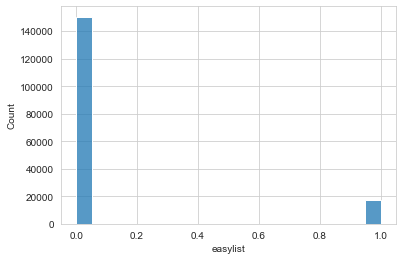

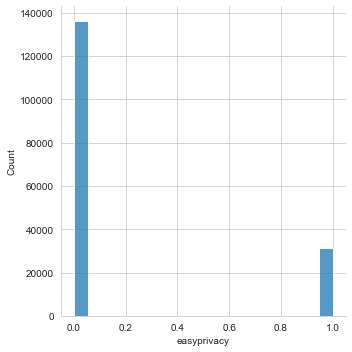

In [39]:
sns.histplot(data, x="easylist")
sns.displot(data, x="easyprivacy")

In [38]:
data["tracker"] = np.where(
    np.logical_or(data.easylist == 1, data.easyprivacy == 1), 1, 0
)
data["tracker"] = data["tracker"].astype(np.int32)

In [39]:
data.drop(["easylist", "easyprivacy"], axis=1, inplace=True)

<AxesSubplot:xlabel='tracker', ylabel='Count'>

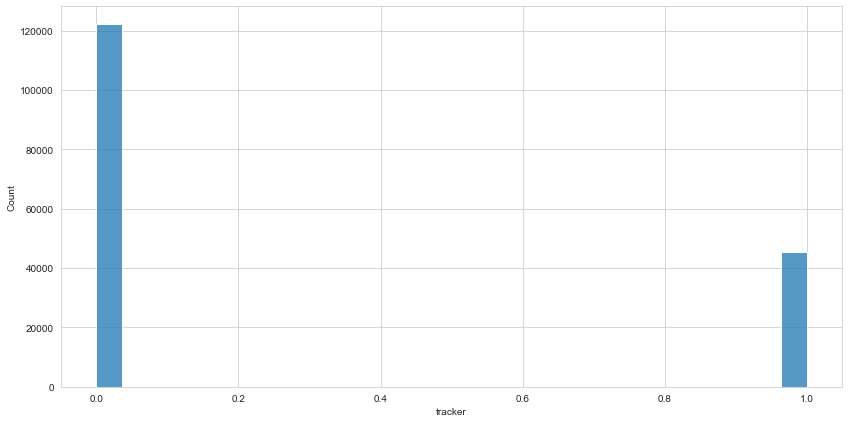

In [61]:
plt.figure(figsize=(14, 7))
sns.histplot(data, x="tracker")

In [295]:
data['tracker'].value_counts()

class_0 = len(data[data['tracker'] == 0]) / 10000
class_1 = len(data[data['tracker'] == 1]) / 10000

class_distribution_ratio = class_1 / class_0
print(class_distribution_ratio)
print(class_0, class_1)

0.372391311470039
12.2092 4.5466


### Check Column Name Similarity

In [41]:
def new_fuzzy_string_matching_for_column(col_name, col_values):
    result = pd.DataFrame(
        process.extract(
            col_name, col_values, processor=None, score_cutoff=80, limit=100
        ),
        columns=["fuzzy_match", "w_ratio", "index"],
    )
    result["col_name"] = col_name
    return result

In [42]:
%%time
data_column_values = data.columns.values[6:-1].tolist()

# 19.2 s ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# match = [new_fuzzy_string_matching_for_column(col, data_column_values) for col in data_column_values]

# 10.9 s ± 218 ms per loop (mean ± std. dev. of 7 runs, 1 loop each), 16216 values
match = [
    new_fuzzy_string_matching_for_column(j, data_column_values[i + 1 :])
    for i, j in enumerate(data_column_values)
    if i != len(data_column_values) - 1
]

match2 = pd.concat(match, ignore_index=True)
print(match2)

                                   fuzzy_match    w_ratio index  \
0                               x-content-type  92.307692   333   
1                                 content_type  91.666667  2218   
2                       x-content-type-options       90.0    15   
3                  x-hs-alternate-content-type       90.0   954   
4      x-tb-optimization-original-content-type       90.0  1089   
...                                        ...        ...   ...   
16171                                  x-bcs-o  83.333333     1   
16172                           x-proxy-scache  92.857143     3   
16173                        x-client-geo-city  86.486486     0   
16174                         x-client-geo-zip  84.848485     2   
16175                         x-client-geo-zip       80.0     1   

                   col_name  
0              content-type  
1              content-type  
2              content-type  
3              content-type  
4              content-type  
...            

In [62]:
%matplotlib inline
plt.figure(figsize=(20, 10))

ct_values = data[["content-type", "tracker"]].dropna()

ct_values

data[['content-type', 'tracker']].value_counts().head(20)

content-type                           tracker
image/jpeg                             0          20179
application/javascript                 0          14993
image/png                              0          13666
image/webp                             0          11292
image/gif                              1          10577
image/svg+xml                          0           8916
text/css                               0           6858
application/javascript; charset=utf-8  0           6557
application/x-javascript               0           4292
application/javascript; charset=utf-8  1           3532
application/javascript                 1           3490
application/json                       0           3312
text/javascript                        1           3270
font/woff2                             0           3230
text/html; charset=utf-8               0           3034
text/plain                             1           2875
application/json; charset=utf-8        0           2441
t

<Figure size 1440x720 with 0 Axes>

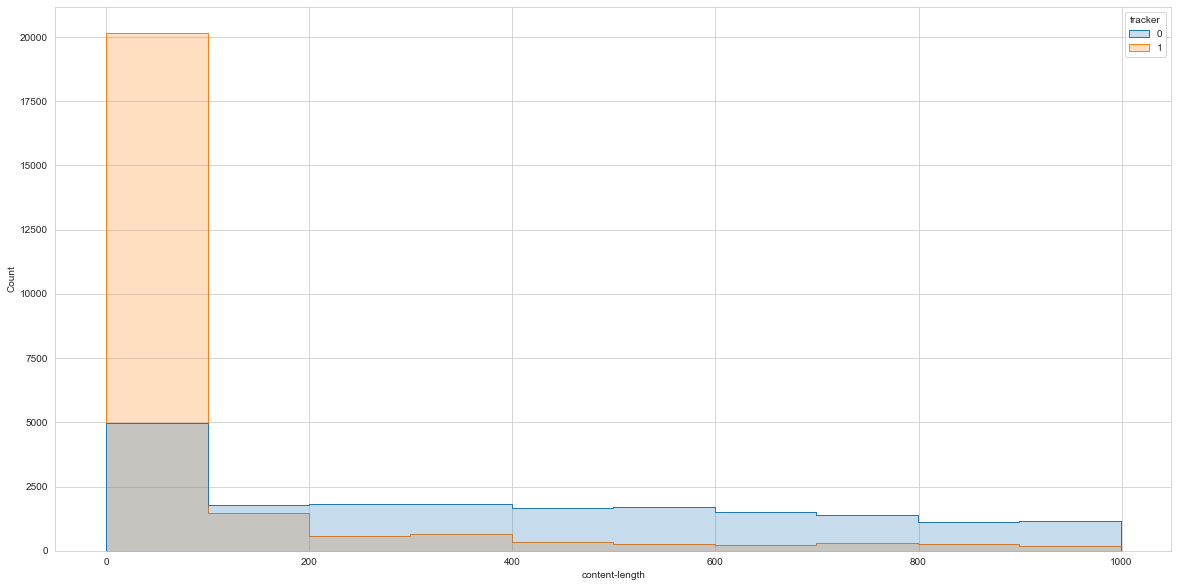

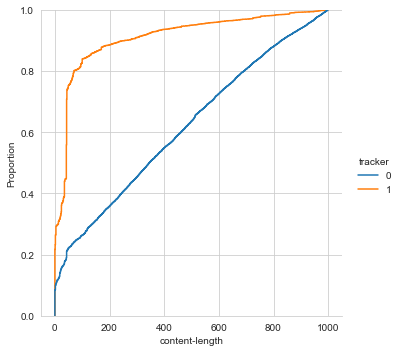

In [64]:
%matplotlib inline
plt.figure(figsize=(20, 10))
cl_values = data[["content-length", "tracker"]].dropna().astype('Int32')
sns.histplot(cl_values[cl_values['content-length'] < 1000], bins=10, x="content-length", hue='tracker', element='step')

sns.displot(cl_values[cl_values['content-length'] < 1000], x="content-length", kind='ecdf', hue='tracker')
plt.show()

In [138]:
match2[match2.col_name == "content-length"]

,fuzzy_match,w_ratio,index,col_name
193,content-lenght,92.857143,1741,content-length
194,content-ex-length,90.322581,3720,content-length
195,x-goog-stored-content-length,90.0,144,content-length
196,x-original-content-length,90.0,828,content-length
197,x-amzn-remapped-content-length,90.0,1006,content-length
198,original-content-length,90.0,1274,content-length
199,x-xiaomi-meta-content-length,90.0,1529,content-length
200,x-upyun-content-length,90.0,1629,content-length
201,x-hola-original-content-length,90.0,1936,content-length
202,cteonnt-length,85.714286,618,content-length


### Explore Distributions

Text(0.5, 1.0, 'Distribution of #NAs Across All Columns')

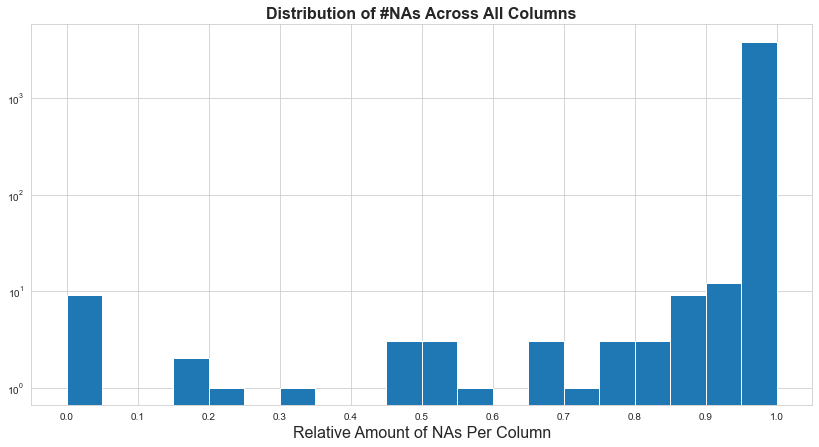

In [580]:
relative_na_per_col = pd.DataFrame((data.isna().sum() / len(data)), columns=["summary"])

plt.figure(figsize=(14, 7))
plt.hist(relative_na_per_col["summary"], log=True, bins=20)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Relative Amount of NAs Per Column", fontdict={"fontsize": 16})
plt.title("Distribution of #NAs Across All Columns", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Distribution of #Values Across All Columns')

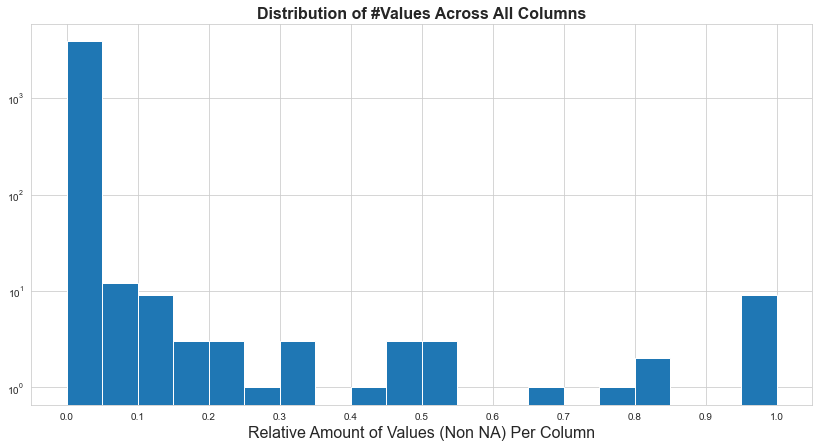

In [579]:
relative_values_per_col = pd.DataFrame((data.count() / len(data)), columns=["summary"])

plt.figure(figsize=(14, 7))
plt.hist(relative_values_per_col["summary"], log=True, bins=20)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Relative Amount of Values (Non NA) Per Column", fontdict={"fontsize": 16})
plt.title("Distribution of #Values Across All Columns", fontsize=16, fontweight="bold")

In [139]:
rel_frequency_per_col = (
    data.groupby("tracker").count() / data.groupby("tracker").count().sum()
)
rel_frequency_per_col.transpose()

tracker,0,1
hostname,0.728655,0.271345
pathname,0.728655,0.271345
filetype,0.728655,0.271345
filename,0.728655,0.271345
protocol,0.728655,0.271345
...,...,...
x-client-geo-city,1.000000,0.000000
x-client-geo-region,1.000000,0.000000
x-client-geo-metrocode,1.000000,0.000000
x-client-geo-zip,1.000000,0.000000


In [111]:
columns_with_more_trackers = rel_frequency_per_col.iloc[
    :, np.where([rel_frequency_per_col.iloc[1, :] > 0.5])[1]
].transpose()
columns_with_more_trackers["total_frequency"] = (
    data[columns_with_more_trackers.index.values].count().values
)
columns_with_more_trackers["total_nas"] = (
    data[columns_with_more_trackers.index.values].isna().sum().values
)
columns_with_more_trackers["ratio_value_total"] = columns_with_more_trackers[
    "total_frequency"
] / len(data)

columns_with_more_trackers.sort_values(by=["total_frequency"], ascending=False)

tracker,0,1,total_frequency,total_nas,ratio_value_total
alt-svc,0.487842,0.512158,37713,129845,0.225074
cross-origin-resource-policy,0.316124,0.683876,25936,141622,0.154788
access-control-allow-credentials,0.467669,0.532331,22873,144685,0.136508
pragma,0.267543,0.732457,20550,147008,0.122644
p3p,0.193632,0.806368,15483,152075,0.092404
...,...,...,...,...,...
x-marintrackerversion,0.000000,1.000000,1,167557,0.000006
tk,0.000000,1.000000,1,167557,0.000006
disposition,0.000000,1.000000,1,167557,0.000006
x-onead-guid,0.000000,1.000000,1,167557,0.000006


In [112]:
columns_with_more_non_trackers = rel_frequency_per_col.iloc[
    :, np.where([rel_frequency_per_col.iloc[0, :] > 0.5])[1]
].transpose()
columns_with_more_non_trackers["total_frequency"] = (
    data[columns_with_more_non_trackers.index.values].count().values
)
columns_with_more_non_trackers["total_nas"] = (
    data[columns_with_more_non_trackers.index.values].isna().sum().values
)
columns_with_more_non_trackers["ratio_value_total"] = columns_with_more_non_trackers[
    "total_frequency"
] / len(data)

columns_with_more_non_trackers.sort_values(by=["total_frequency"], ascending=False)

tracker,0,1,total_frequency,total_nas,ratio_value_total
hostname,0.728655,0.271345,167558,0,1.000000
protocol,0.728655,0.271345,167558,0,1.000000
query,0.728655,0.271345,167558,0,1.000000
pathname,0.728655,0.271345,167558,0,1.000000
filename,0.728655,0.271345,167558,0,1.000000
...,...,...,...,...,...
x-request-minified,1.000000,0.000000,1,167557,0.000006
x-smart-cache,1.000000,0.000000,1,167557,0.000006
x-smart-cache-id,1.000000,0.000000,1,167557,0.000006
x-smart-cache-ttl,1.000000,0.000000,1,167557,0.000006


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

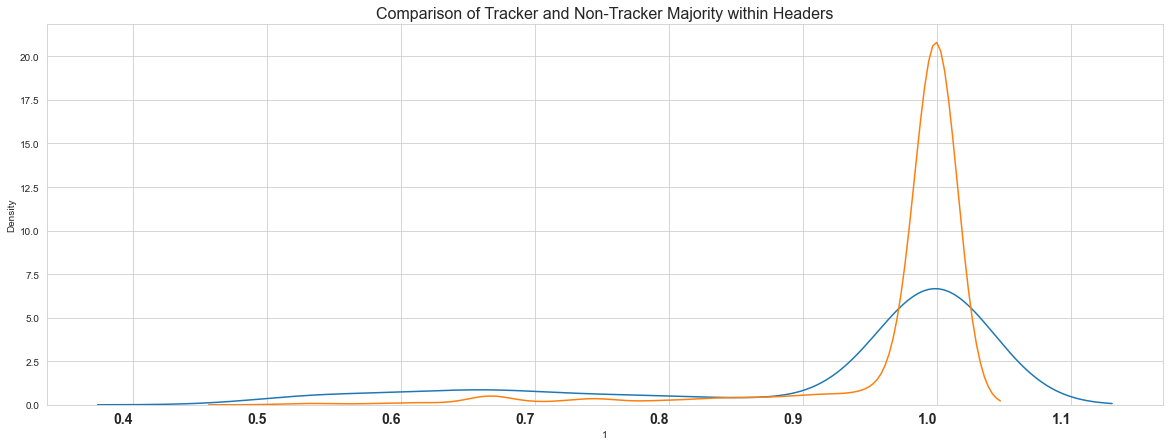

In [115]:
plt.figure(figsize=(20, 7))
sns.kdeplot(columns_with_more_trackers.iloc[:, 1])
sns.kdeplot(columns_with_more_non_trackers.iloc[:, 0])
plt.title(
    "Comparison of Tracker and Non-Tracker Majority within Headers",
    fontdict={"fontsize": 16},
)
plt.xticks(fontsize=14, fontweight="bold", ha="right")

Text(0.5, 0.98, 'Relative Frequency per Column by Tracker Classification')

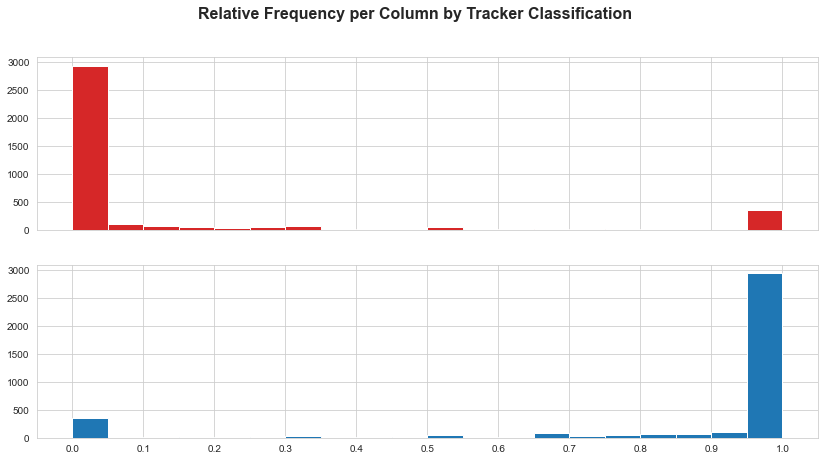

In [577]:
fig, ax = plt.subplots(2, sharex=True, figsize=(14, 7))

ax[0].hist(rel_frequency_per_col.loc[1, :], bins=20, color="tab:red")
ax[1].hist(rel_frequency_per_col.loc[0, :], bins=20)
plt.xticks(np.arange(0, 1.1, 0.1))
fig.suptitle(
    "Relative Frequency per Column by Tracker Classification",
    fontsize=16,
    fontweight="bold",
)

In [568]:
tracker_values = pd.DataFrame(rel_frequency_per_col.loc[1, :])
tracker_values = tracker_values[tracker_values[1] >= 0.95]
tracker_values.rename(columns={1: "rel_frequency"}, inplace=True)
tracker_values

,rel_frequency
google-lineitem-id,0.996198
google-creative-id,0.996198
google-mediationgroup-id,0.995261
google-mediationtag-id,0.995261
time-delta-millis,1.000000
...,...
x-bcs,1.000000
x-bc-bl,1.000000
x-bcs-o,1.000000
x-o1-bcs-ban,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

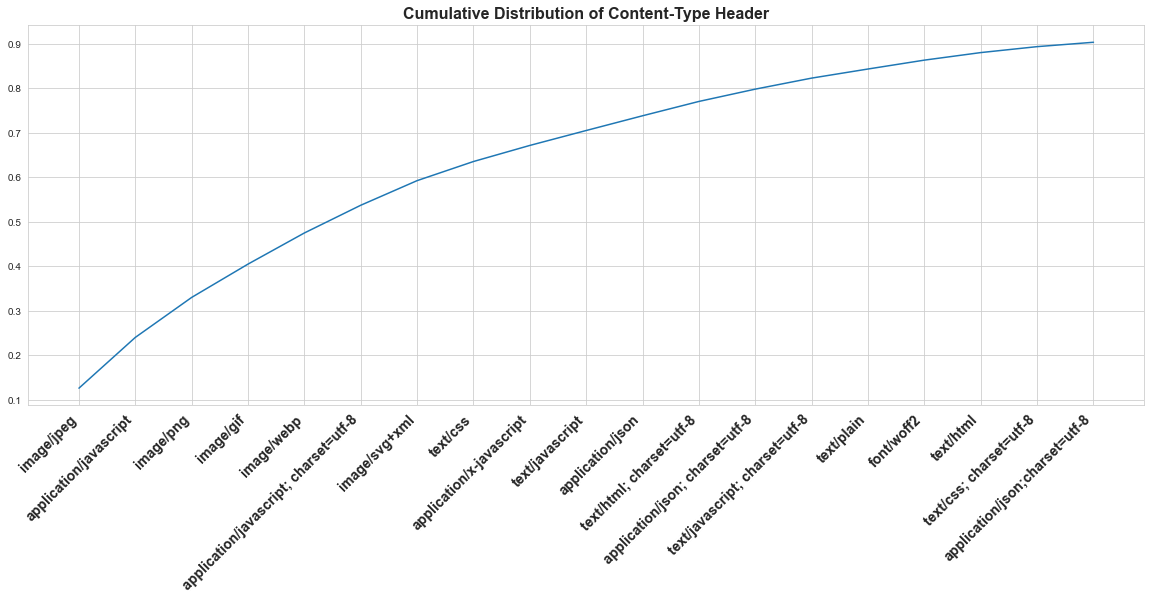

In [576]:
plt.figure(figsize=(20, 7))
plt.plot(
    (
        data["content-type"].value_counts().cumsum()
        / data["content-type"].value_counts().sum()
    )[0:19]
)
plt.title(
    "Cumulative Distribution of Content-Type Header", fontsize=16, fontweight="bold"
)
plt.xticks(rotation=45, fontsize=14, fontweight="bold", ha="right")

In [62]:
def create_value_comparison(header_field, n_values):
    header_field_df = pd.DataFrame(
    data[[f"{header_field}", "tracker"]].value_counts()
        ).reset_index()
    header_field_df.columns = [f"{header_field}", "tracker", "frequency"]
    header_field_df.sort_values(by=["frequency"], ascending=False, inplace=True)

    test_values = header_field_df[0:n_values][f"{header_field}"].values.tolist()
    frequent_content_types = (
        header_field_df[header_field_df[f"{header_field}"].isin(test_values)]
        .reset_index()
        .sort_values(by=f"{header_field}")
    )
    non_tracker = frequent_content_types[frequent_content_types.tracker == 0]
    tracker = frequent_content_types[frequent_content_types.tracker == 1]
    return non_tracker, tracker

In [99]:
def create_value_comparison_plot(non_tracker, tracker, n, header_field):
    r = np.arange(n)
    width = 0.25

    plt.figure(figsize=(20, 7))
    plt.bar(r, non_tracker["frequency"], log=True, label="Non Tracker", width=width)
    plt.bar(r + width, tracker["frequency"], log=True, label="Tracker", width=width)
    plt.xticks(
        r + width / 2,
        non_tracker[f"{header_field}"].values.tolist(),
        rotation=45,
        fontsize=12,
        fontweight="bold",
        ha="right",
    )
    plt.legend()

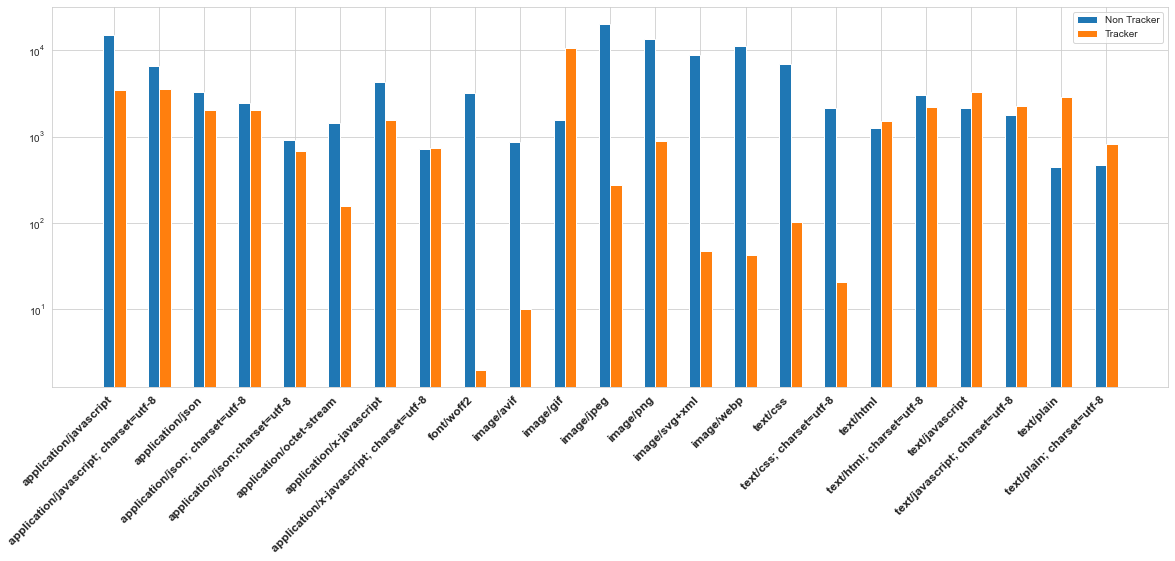

In [77]:
non_tracker_ct, tracker_ct = create_value_comparison("content-type", 34)
create_value_comparison_plot(non_tracker_ct, tracker_ct, len(tracker_ct))

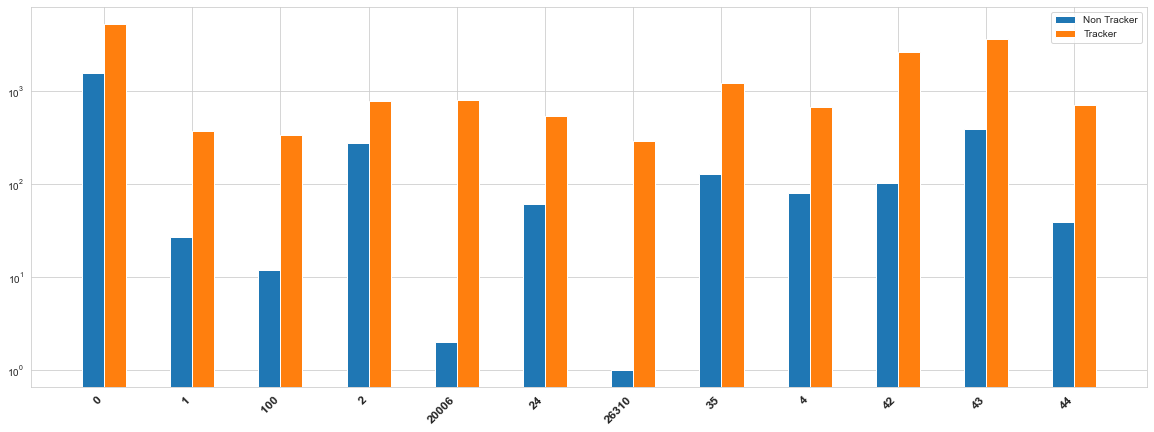

In [105]:
non_tracker_cl, tracker_cl = create_value_comparison("content-length", 14)
create_value_comparison_plot(non_tracker_cl, tracker_cl, len(tracker_cl), 'content-length')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

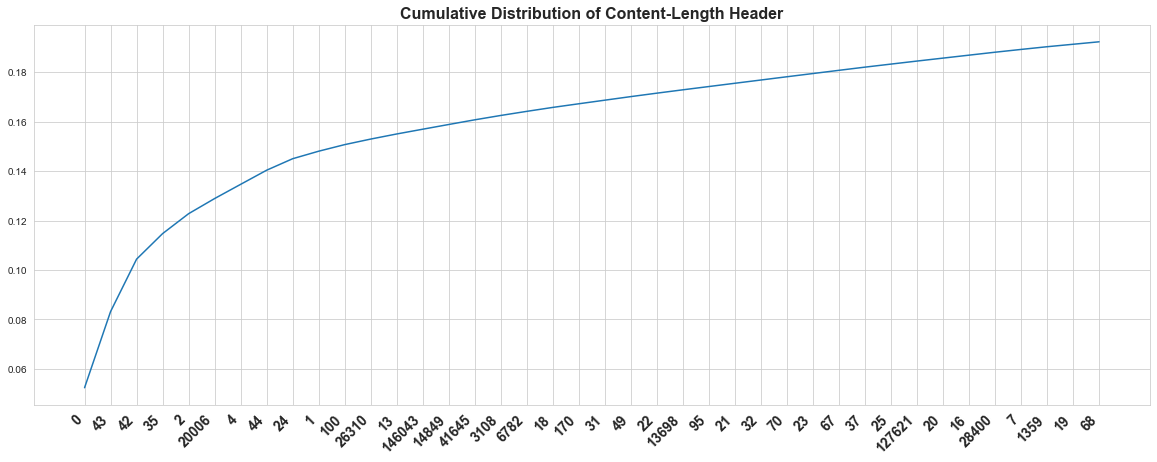

In [143]:
plt.figure(figsize=(20, 7))
plt.plot(
    (
        data["content-length"].value_counts().cumsum()
        / data["content-length"].value_counts().sum()
    )[0:40]
)
plt.title(
    "Cumulative Distribution of Content-Length Header", fontsize=16, fontweight="bold"
)
plt.xticks(rotation=45, fontsize=14, fontweight="bold", ha="right")

In [144]:
data["content-length"].value_counts().cumsum()

0           6885
43         10932
42         13719
35         15076
2          16135
           ...  
385400    131420
17074     131421
38531     131422
170748    131423
99987     131424
Name: content-length, Length: 40106, dtype: int64

In [162]:
data["content-length"].astype("Int32").memory_usage(deep=True)

837918

In [165]:
data["content-length"].memory_usage(deep=True)

4210466

In [177]:
# report-to: {"group":"cspcollectorhttp","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/cspcollectorhttp/external"}]}
# alt-svc
# access-control-allow-methods

data['cteonnt-length'].dropna()

data.loc[6511, ["content-length", "cteonnt-length", "ntcoent-length", "content-lenght"]]

content-length      913
cteonnt-length    15185
ntcoent-length      NaN
content-lenght      NaN
Name: 6511, dtype: object

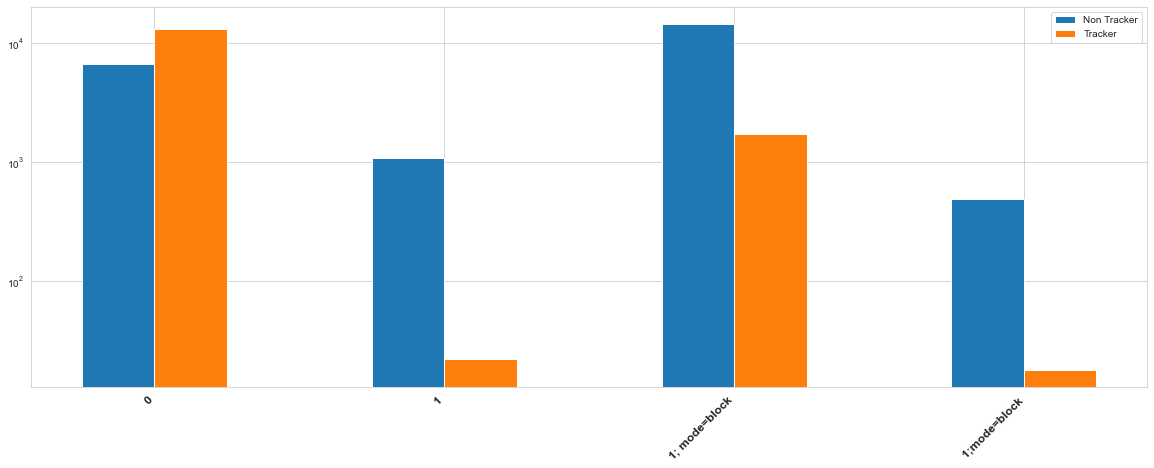

In [122]:
non_tracker_xss, tracker_xss = create_value_comparison("x-xss-protection", 6)
create_value_comparison_plot(non_tracker_xss, tracker_xss, len(tracker_xss), 'x-xss-protection')

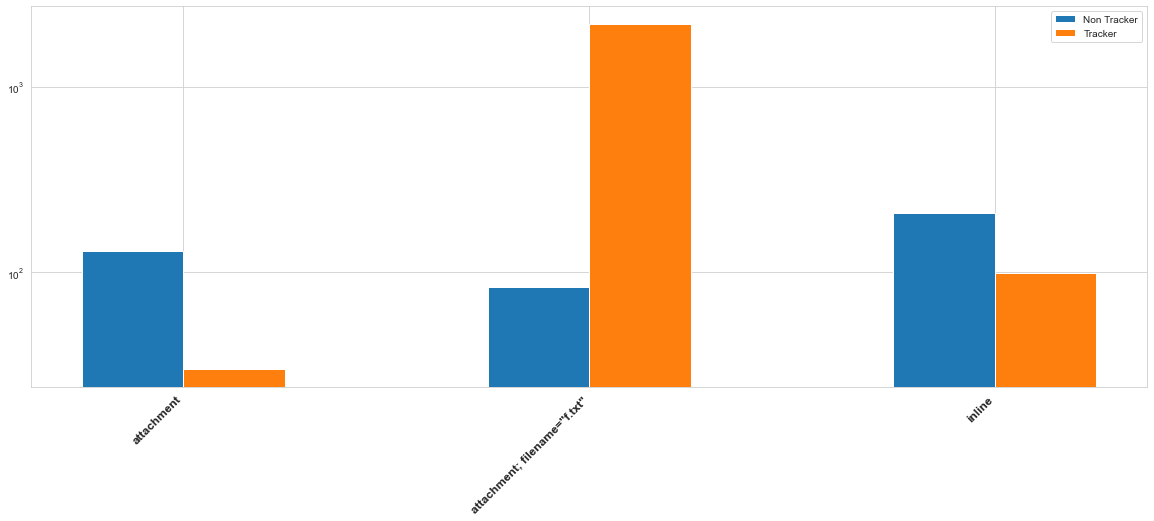

In [124]:
non_tracker_cd, tracker_cd = create_value_comparison("content-disposition", 4)
create_value_comparison_plot(non_tracker_cd, tracker_cd, len(tracker_cd), 'content-disposition')

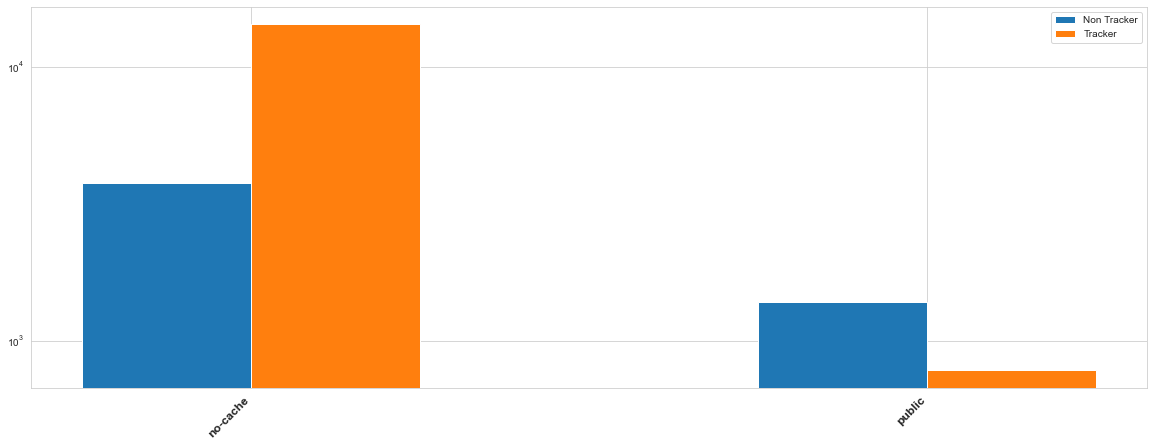

In [125]:
non_tracker_p, tracker_p = create_value_comparison("pragma", 4)
create_value_comparison_plot(non_tracker_p, tracker_p, len(tracker_p), 'pragma')

In [95]:
non_tracker_cl

,index,server,tracker,frequency
2,2,amazons3,0,11006
4,4,apache,0,5094
16,139,cafe,0,83
1,1,cloudflare,0,18901
0,0,nginx,0,21803
9,9,server,0,3464
6,6,sffe,0,3920
7,7,tengine,0,3770


In [96]:
tracker_cl

,index,server,tracker,frequency
12,13,amazons3,1,2046
13,22,apache,1,780
3,3,cafe,1,6459
10,10,cloudflare,1,2518
8,8,golfe2,1,3554
5,5,nginx,1,4081
14,26,server,1,611
11,11,sffe,1,2478
15,62,tengine,1,196


In [97]:
pd.DataFrame(
    data[[f"server", "tracker"]].value_counts()
        ).reset_index()

,server,tracker,0
0,nginx,0,21803
1,cloudflare,0,18901
2,amazons3,0,11006
3,cafe,1,6459
4,apache,0,5094
...,...,...,...
1413,mt3 4409 ba5503e master zrh-pixel-x9 config:1.0.0,1,1
1414,mt3 4409 ba5503e master zrh-pixel-x4 config:1.0.0,0,1
1415,mt3 4409 ba5503e master zrh-pixel-x31 config:1...,1,1
1416,mt3 4409 ba5503e master zrh-pixel-x29 config:1...,1,1


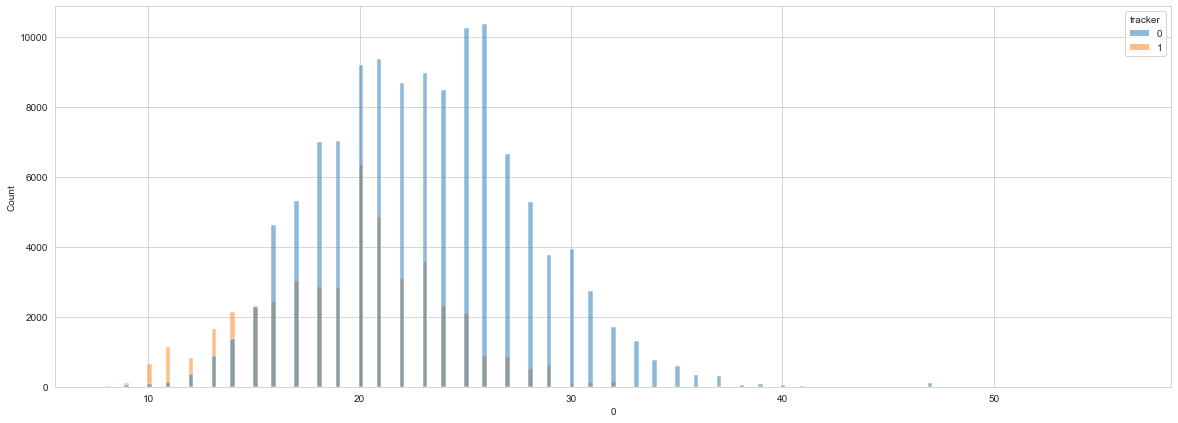

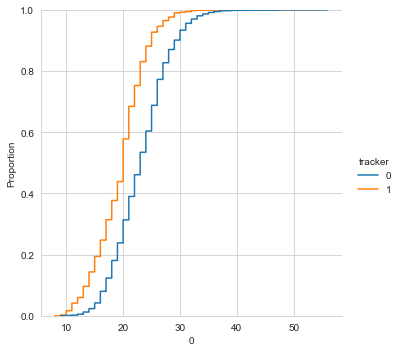

In [65]:
plt.figure(figsize=(20, 7))
# TODO change var name, a bit misleading here
na_per_row = pd.DataFrame((data.isnull().sum(axis=1) - len(data.columns))*-1)
na_per_row["tracker"] = data["tracker"]

sns.histplot(na_per_row, hue='tracker', x=na_per_row.columns.values[0])
sns.displot(na_per_row, hue='tracker', x=na_per_row.columns.values[0], kind='ecdf')

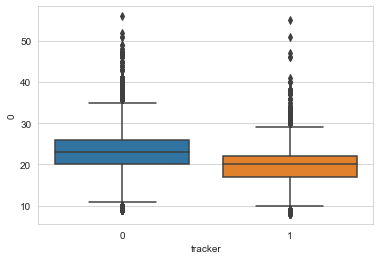

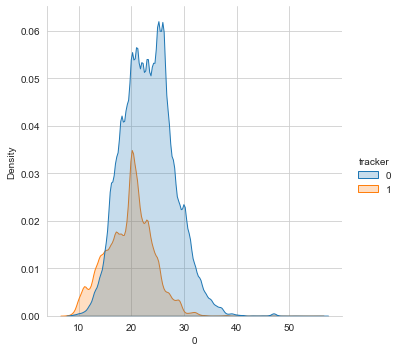

In [66]:
sns.boxplot(data=na_per_row, y=na_per_row.columns.values[0], x='tracker')
sns.displot(na_per_row, hue='tracker', x=na_per_row.columns.values[0], kind='kde', fill=True)

In [371]:
less_ten_headers = data[((data.isnull().sum(axis=1) - len(data.columns))*-1) <= 10].dropna(axis=1, how='all')

less_ten_headers

,hostname,pathname,filetype,filename,protocol,query,content-type,cache-control,pragma,date,...,access-control-allow-credentials,x-azure-ref,set-cookie,connection,transfer-encoding,x-amzn-requestid,apigw-requestid,x-33x-status,server-info,tracker
483,js.bd.dhsz.cn,/js/PDPS000000058043.js,js,PDPS000000058043.js,https:,[],text/javascript; charset=utf-8,NaN,NaN,"wed, 18 may 2022 13:15:54 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
507,js.bd.dhsz.cn,/js/PDPS000000058046.js,js,PDPS000000058046.js,https:,[],text/javascript; charset=utf-8,NaN,NaN,"wed, 18 may 2022 13:15:54 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
539,js.bd.dhsz.cn,/js/PDPS000000016827.js,js,PDPS000000016827.js,https:,[],text/javascript; charset=utf-8,NaN,NaN,"wed, 18 may 2022 13:15:55 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
555,js.bd.dhsz.cn,/impress,/impress,impress,https:,"[[p, PDPS000000058043], [u, 1], [pf, baidu], [...",application/json; charset=utf-8,NaN,NaN,"wed, 18 may 2022 13:15:56 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
557,js.bd.dhsz.cn,/impress,/impress,impress,https:,"[[p, PDPS000000058046], [u, 1], [pf, baidu], [...",application/json; charset=utf-8,NaN,NaN,"wed, 18 may 2022 13:15:56 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166373,clients1.google.com,/generate_204,/generate_204,generate_204,https:,[],NaN,NaN,NaN,"wed, 18 may 2022 15:05:51 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
166419,tpc.googlesyndication.com,/generate_204,/generate_204,generate_204,https:,"[[r9S9pg, ]]",NaN,NaN,NaN,"wed, 18 may 2022 15:05:53 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167493,tpc.googlesyndication.com,/generate_204,/generate_204,generate_204,https:,"[[iFvV0A, ]]",NaN,NaN,NaN,"wed, 18 may 2022 15:06:22 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167509,tpc.googlesyndication.com,/generate_204,/generate_204,generate_204,https:,"[[uc6SIw, ]]",NaN,NaN,NaN,"wed, 18 may 2022 15:06:23 gmt",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [21]:
def test(element):
    if element in ['x-nws-log-uuid', 'traceid', 'x-oss-hash-crc64ecma',
                   'x-neory-subid', 'gsid', 'cdn-request-id', 'dd.trace_id',
                   'x-amz-meta-cld-surrogate-key', 'dd-trace-id',
                   'x-fc-code-checksum', 'tracecode', 'x-cos-hash-crc64ecma']:
        return None
    try:
        # print(element)
        data[element] = data[element].astype("Int64")
        return {element: "Int64"}
    except ValueError:
        pass

In [53]:
%%time
braze = data.iloc[:,8:].parallel_apply(lambda x: test(x.name))

CPU times: user 1.07 s, sys: 1.91 s, total: 2.99 s
Wall time: 9.41 s


In [23]:
braze = list(filter(lambda x: type(x) is dict, braze[0].tolist()))

In [28]:
braze = {k: v for d in braze for k, v in d.items()}

In [29]:
dict_categories_.update(braze)

In [96]:

data.columns.get_indexer(list(data.select_dtypes('category').columns.values))

array([   0,    1,    2, ..., 3914, 3915, 3916])